### Approve or Reject based on Applicant’s profile:

#### Identify key drivers behind loan default by borrowers: 

In [31]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
#Reading File Data
loan_data = pd.read_csv("C:/testfiles/lendingcasestudy/loan.csv")

In [33]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [147]:
#Remove columns having unique values like "NA"

In [79]:
loan_data.drop(['mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m',
'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util'], axis = 1,inplace = True)

In [80]:
loan_data.shape

(39717, 83)

In [81]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 83, dtype: int64

In [82]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,15-Jan,171.62,NaN,16-May,0.0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1.11,13-Apr,119.66,NaN,13-Sep,0.0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,14-Jun,649.91,NaN,16-May,0.0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,15-Jan,357.48,NaN,16-Apr,0.0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,16-May,67.79,16-Jun,16-May,0.0,0.0,0,0.0,0.0


In [83]:
loan_data.shape

(39717, 54)

In [84]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [85]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [86]:
(loan_data.isna().sum()/len(loan_data.index))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
term                            0.000000
int_rate                        0.000000
installment                     0.000000
grade                           0.000000
sub_grade                       0.000000
emp_title                       6.185033
emp_length                      2.677761
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_d                         0.000000
loan_status                     0.000000
pymnt_plan                      0.000000
url                             0.000000
desc                           32.472717
purpose                         0.000000
title                           0.028514
zip_code                        0.000000
addr_state                      0.000000
dti             

In [87]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [88]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [89]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [90]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

In [91]:
loan_data.revol_util = loan_data.revol_util.replace("nan", np.nan)
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.str.replace('%', ''), errors='coerce')

In [92]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [93]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [94]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,15-Jan,171.62,NaN,16-May,0.0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.11,13-Apr,119.66,NaN,13-Sep,0.0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,14-Jun,649.91,NaN,16-May,0.0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,15-Jan,357.48,NaN,16-Apr,0.0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.00,15-Jan,161.03,NaN,16-Jan,0.0,0.0,0,0.0,0.0


<Axes: >

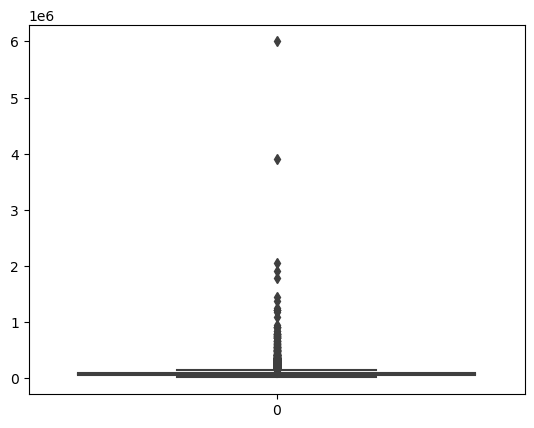

In [95]:
sns.boxplot(loan_data['annual_inc'])

In [96]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [98]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<Axes: >

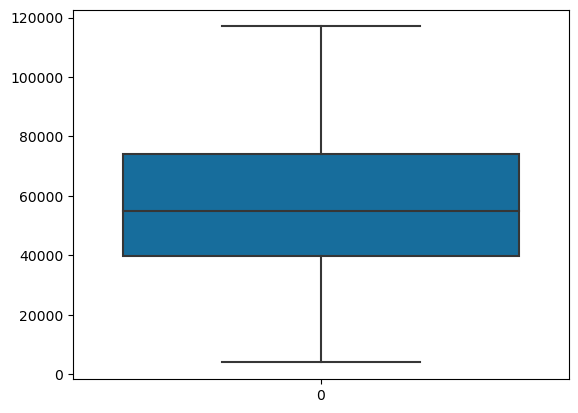

In [72]:
sns.boxplot(loan_data.annual_inc)

<Axes: >

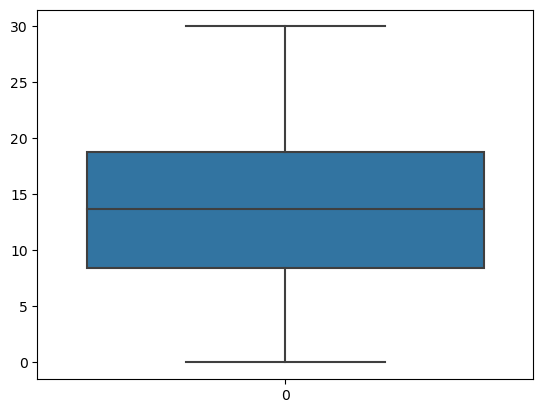

In [99]:
sns.boxplot(loan_data.dti)

<Axes: >

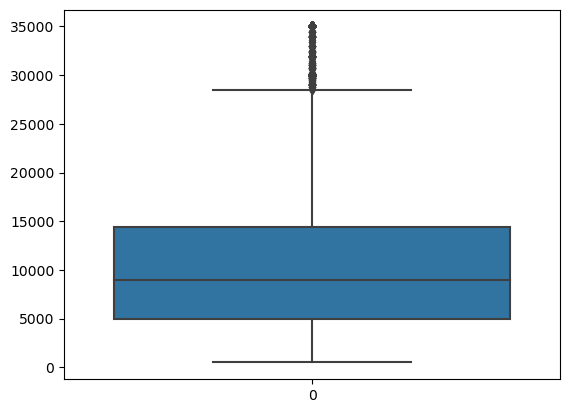

In [100]:
sns.boxplot(loan_data.loan_amnt)

In [101]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14400.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26000.0
0.980    28000.0
0.990    34000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<Axes: >

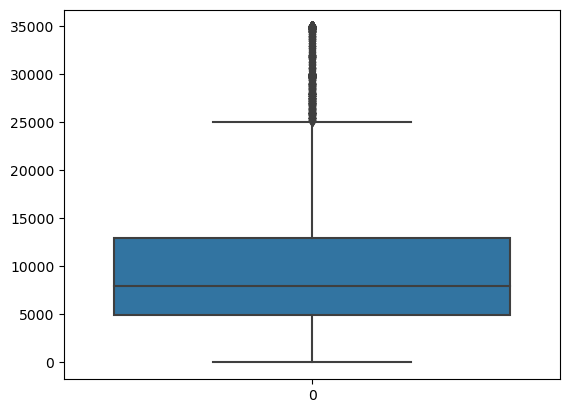

In [102]:
sns.boxplot(loan_data.funded_amnt_inv)

In [103]:
loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8000.000000
0.750    13000.000000
0.900    19150.000000
0.950    23175.000000
0.970    24923.518770
0.975    25000.000000
0.980    26000.000000
0.985    28701.190382
0.990    30000.000000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

<Axes: xlabel='loan_status', ylabel='count'>

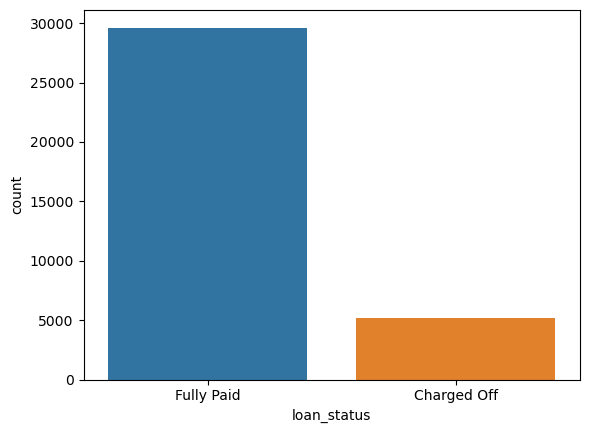

In [104]:
sns.countplot(x = 'loan_status', data = loan_data)

In [105]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<Axes: xlabel='grade', ylabel='count'>

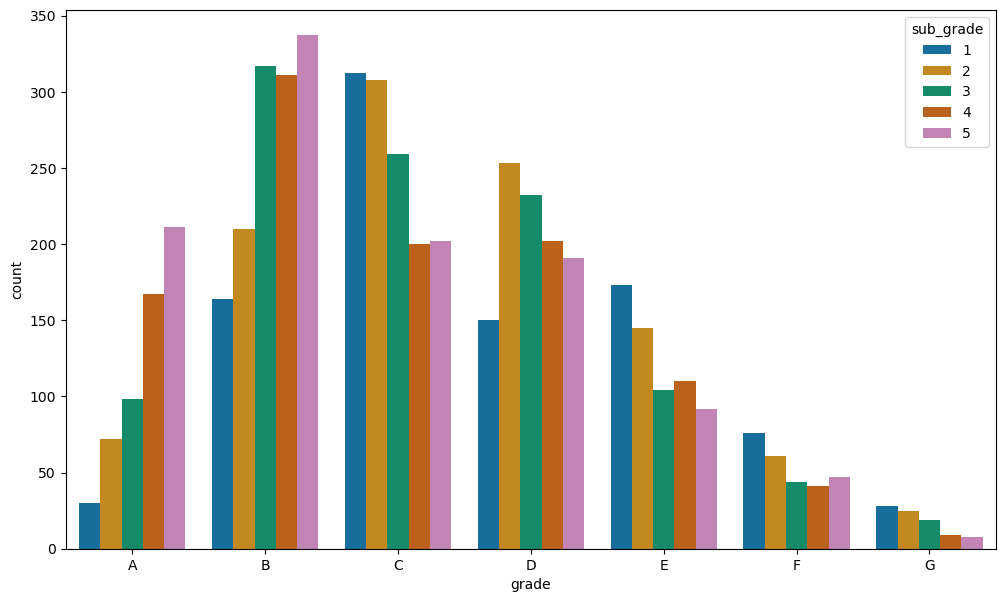

In [106]:
# Check LC assigned loan grade
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='grade', ylabel='count'>

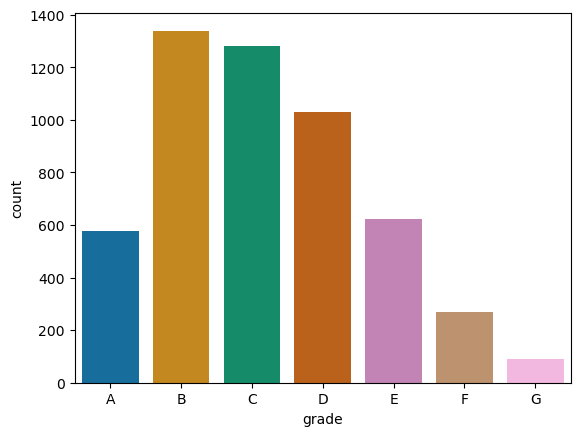

In [107]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [ ]:
# Check home_ownership
loan_data['home_ownership'].unique()

np.array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'OTHERS'], dtype=object)

#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHERS',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

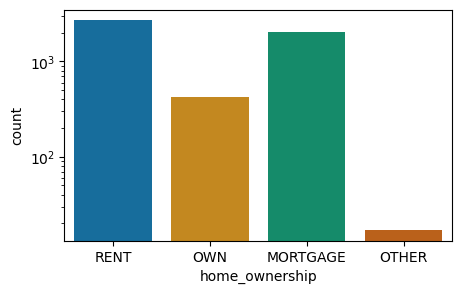

In [149]:
fig, ax = plt.subplots(figsize = (5,3))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='count', ylabel='purpose'>

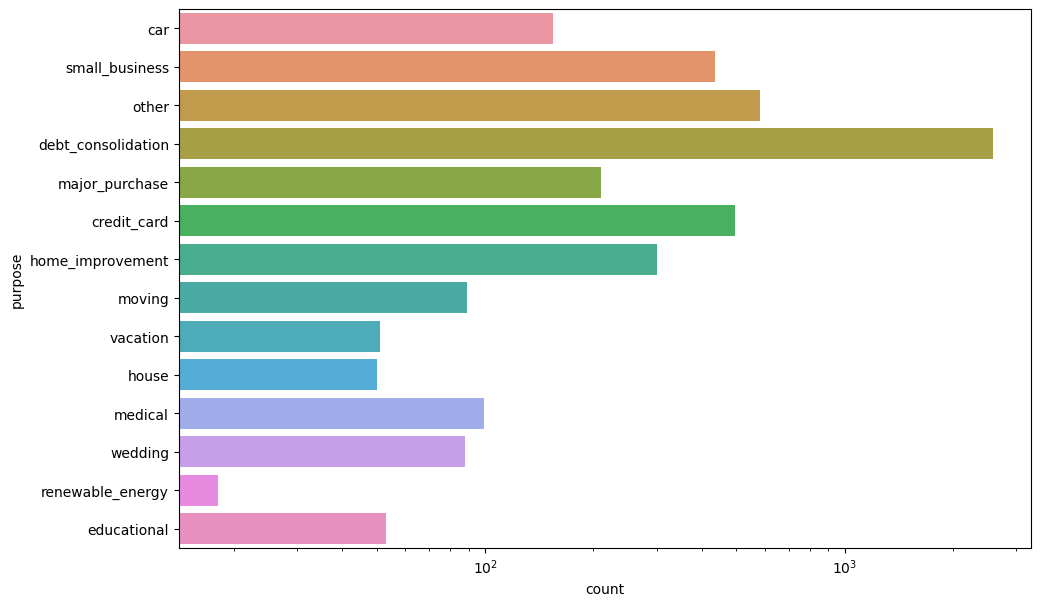

In [150]:
# Check Loan Purpose
fig, ax = plt.subplots(figsize = (11,7))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [126]:
#creating bins for int_rate,open_acc,revol_util,total_acc & annual_inc

loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [128]:
# Viewing new bins created
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,2,...,0.0,0.0,0,0.0,0.0,9%-13%,2-10,80-100,2-20,3k-31k
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,...,0.0,0.0,0,0.0,0.0,13%-17%,2-10,0-20,2-20,31k-58k
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,5,...,0.0,0.0,0,0.0,0.0,13%-17%,2-10,80-100,2-20,3k-31k
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,...,0.0,0.0,0,0.0,0.0,13%-17%,2-10,20-40,37-55,31k-58k
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,...,0.0,0.0,0,0.0,0.0,5%-9%,2-10,20-40,2-20,31k-58k


<Axes: xlabel='emp_length', ylabel='count'>

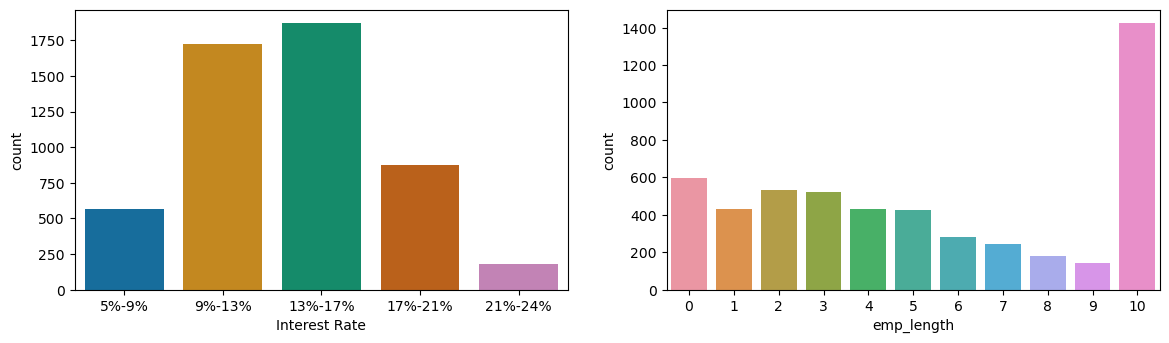

In [151]:
#Check Interest Rate and Emp length
fig, ax = plt.subplots(figsize = (14,8))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='open_acc_groups', ylabel='count'>

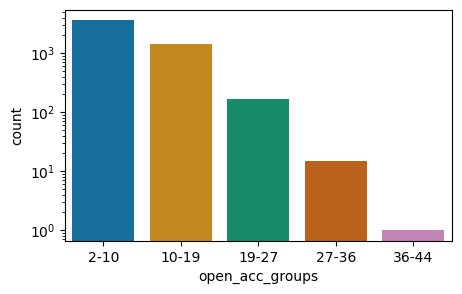

In [152]:
#Check The number of open credit lines and Revolving line utilization rate:
fig, ax = plt.subplots(figsize = (5,3))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='revol_util_groups', ylabel='count'>

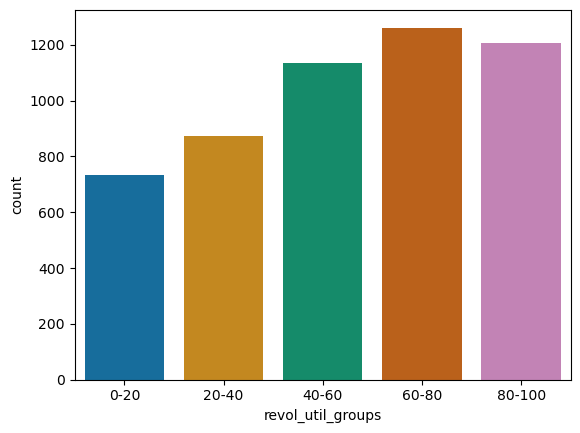

In [133]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='total_acc_groups', ylabel='count'>

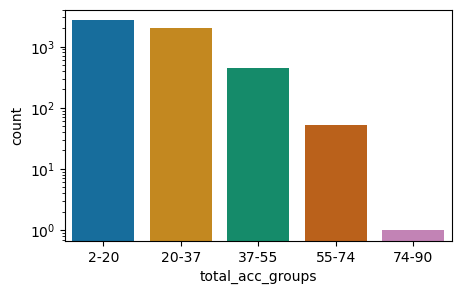

In [153]:
#Check The total number of credit lines currently in the borrower's credit file:
fig, ax = plt.subplots(figsize = (5,3))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='annual_inc_groups', ylabel='count'>

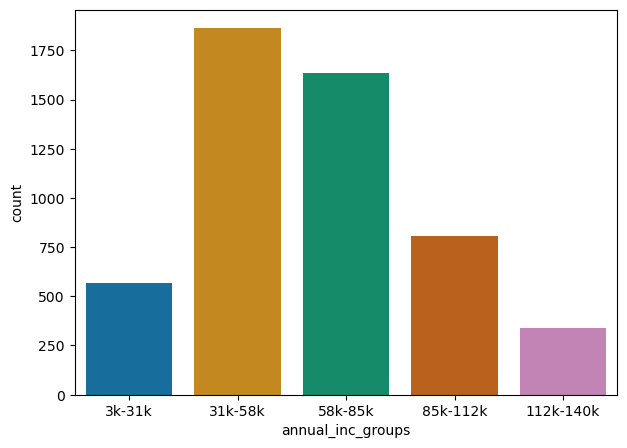

In [154]:
#Check The self-reported annual income provided by the borrower during registration:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<Axes: xlabel='count', ylabel='term'>

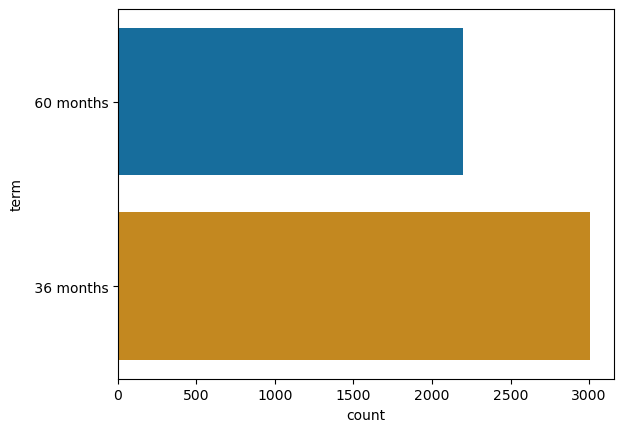

In [136]:
#Check Loan Term period
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='inq_last_6mths', ylabel='count'>

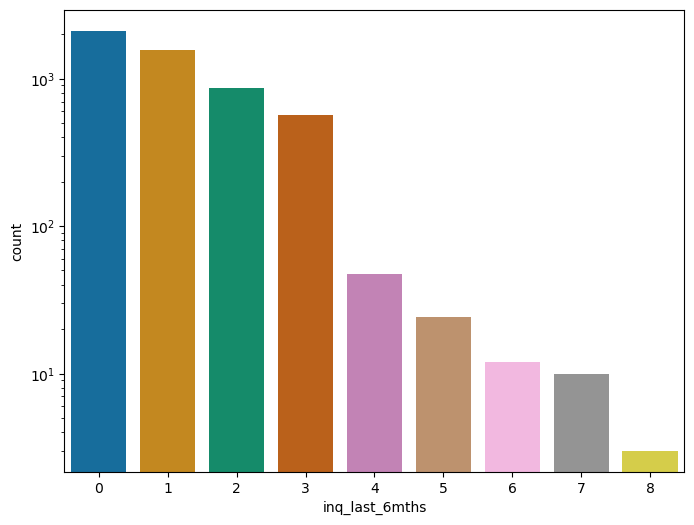

In [155]:
# Check The number of inquiries in past 6 months (excluding auto and mortgage inquiries):
fig,ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='pub_rec', ylabel='count'>

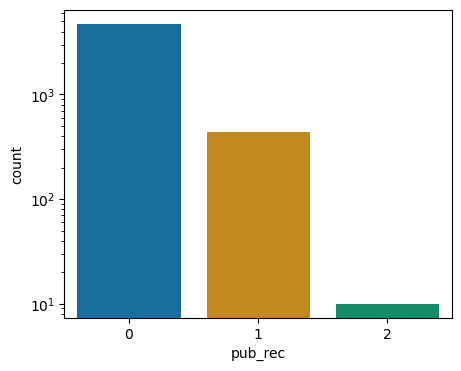

In [156]:
#Check Number of derogatory public records:
fig,ax = plt.subplots(figsize = (5,4))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [139]:
#Check Loan Start Month & Year 
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [140]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,delinq_amnt,pub_rec_bankruptcies,tax_liens,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,2,...,0,0.0,0.0,9%-13%,2-10,80-100,2-20,3k-31k,11,20Dec
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,...,0,0.0,0.0,13%-17%,2-10,0-20,2-20,31k-58k,11,20Dec
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,5,...,0,0.0,0.0,13%-17%,2-10,80-100,2-20,3k-31k,11,20Dec
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,...,0,0.0,0.0,13%-17%,2-10,20-40,37-55,31k-58k,11,20Dec
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,...,0,0.0,0.0,5%-9%,2-10,20-40,2-20,31k-58k,11,20Dec


<Axes: xlabel='issue_year', ylabel='count'>

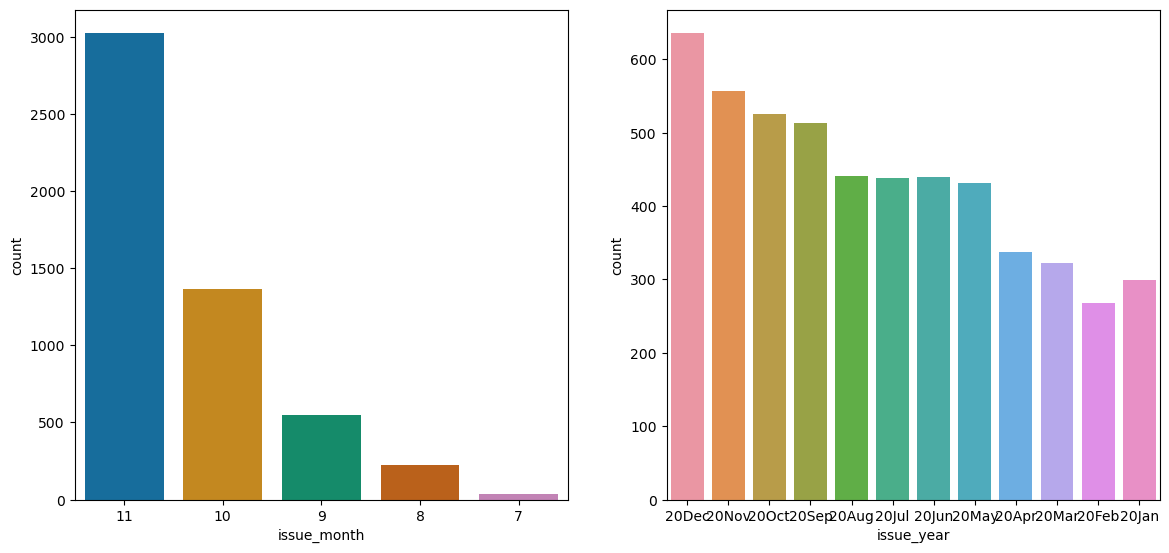

In [157]:
plt.figure(figsize=(14,14))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [142]:
#Check The monthly payment owed by the borrower if the loan originates
#Check The total amount committed by investors for that loan at that point in time.
#Check Loan Amount Groups
#Check DTI Ratio
#Check Installment Groups
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

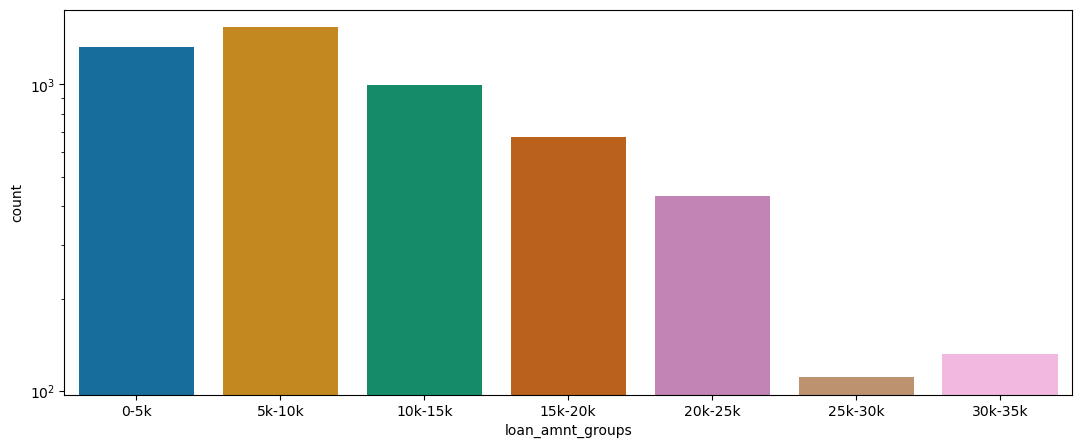

In [158]:
fig,ax = plt.subplots(figsize = (13,5))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='dti_groups', ylabel='count'>

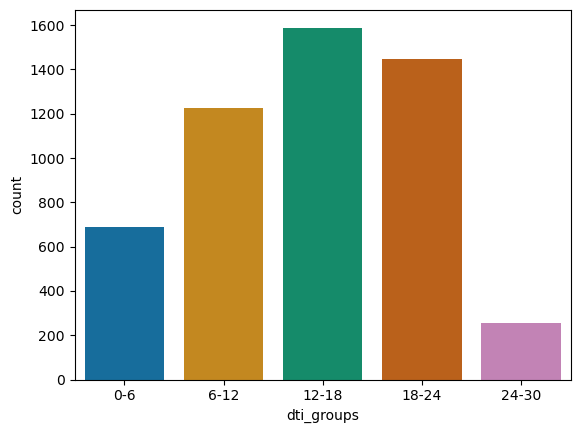

In [144]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<Axes: xlabel='installment_groups', ylabel='count'>

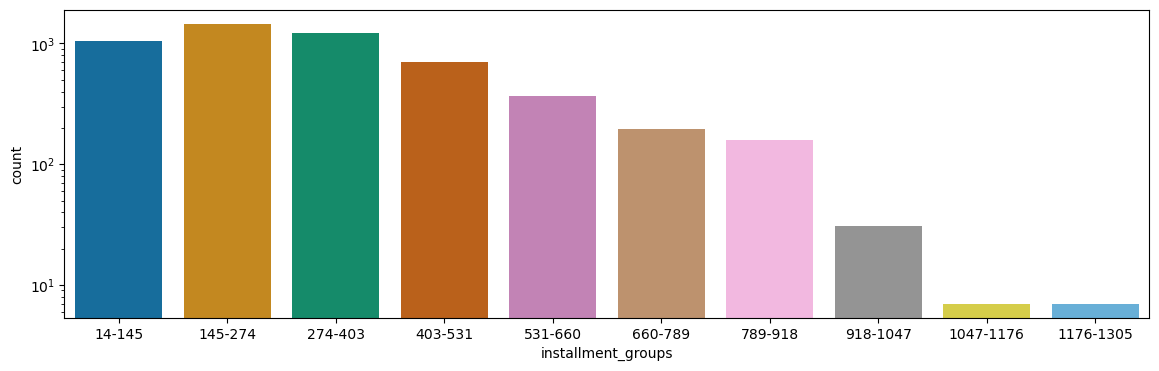

In [159]:
fig,ax = plt.subplots(figsize = (14,4))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [ ]:
# driving factors (or driver variables) behind loan default:

Borrowers likely to become into Default category:
1. Paying interest range 13% to 17% 
2. Those who get loan to clear existing debts
3. Those who get salary range 31k to 58K
4. Those in employment period more than 10 years
5. Those are staying in Rental
6. Those in DTI ratio between 12-18 
7. The number of open credit lines in the borrower's credit file.
8. When there is no derogatory public records
9. when loan terms are given for short period - 36 Months
10. LC assigned loan grade in B Level
11. Loans sanctioned in Year 2011
12  Loans paid in Installment Group range: 145 To 274
13. Those made more inquiries in past 6 months (excluding auto and mortgage inquiries)